In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv("./fred/QUSPAM770A.csv")


In [108]:
df

,DATE,QUSPAM770A
0,1972-01-01,92.5
1,1972-04-01,93.7
2,1972-07-01,93.9
3,1972-10-01,94.6
4,1973-01-01,94.8
...,...,...
118,2001-07-01,140.3
119,2001-10-01,141.3
120,2002-01-01,141.9
121,2002-04-01,143.1


In [109]:
df["diff_gdp"] = df['QUSPAM770A'].diff()


In [110]:
df = df.dropna()
df

,DATE,QUSPAM770A,diff_gdp
1,1972-04-01,93.7,1.2
2,1972-07-01,93.9,0.2
3,1972-10-01,94.6,0.7
4,1973-01-01,94.8,0.2
5,1973-04-01,95.8,1.0
...,...,...,...
118,2001-07-01,140.3,2.0
119,2001-10-01,141.3,1.0
120,2002-01-01,141.9,0.6
121,2002-04-01,143.1,1.2


In [111]:
import matplotlib.pyplot as plt

In [112]:
df = df.rename(columns={'QUSPAM770A': 'GDP'})

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 1 to 122
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      122 non-null    object 
 1   GDP       122 non-null    float64
 2   diff_gdp  122 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.8+ KB


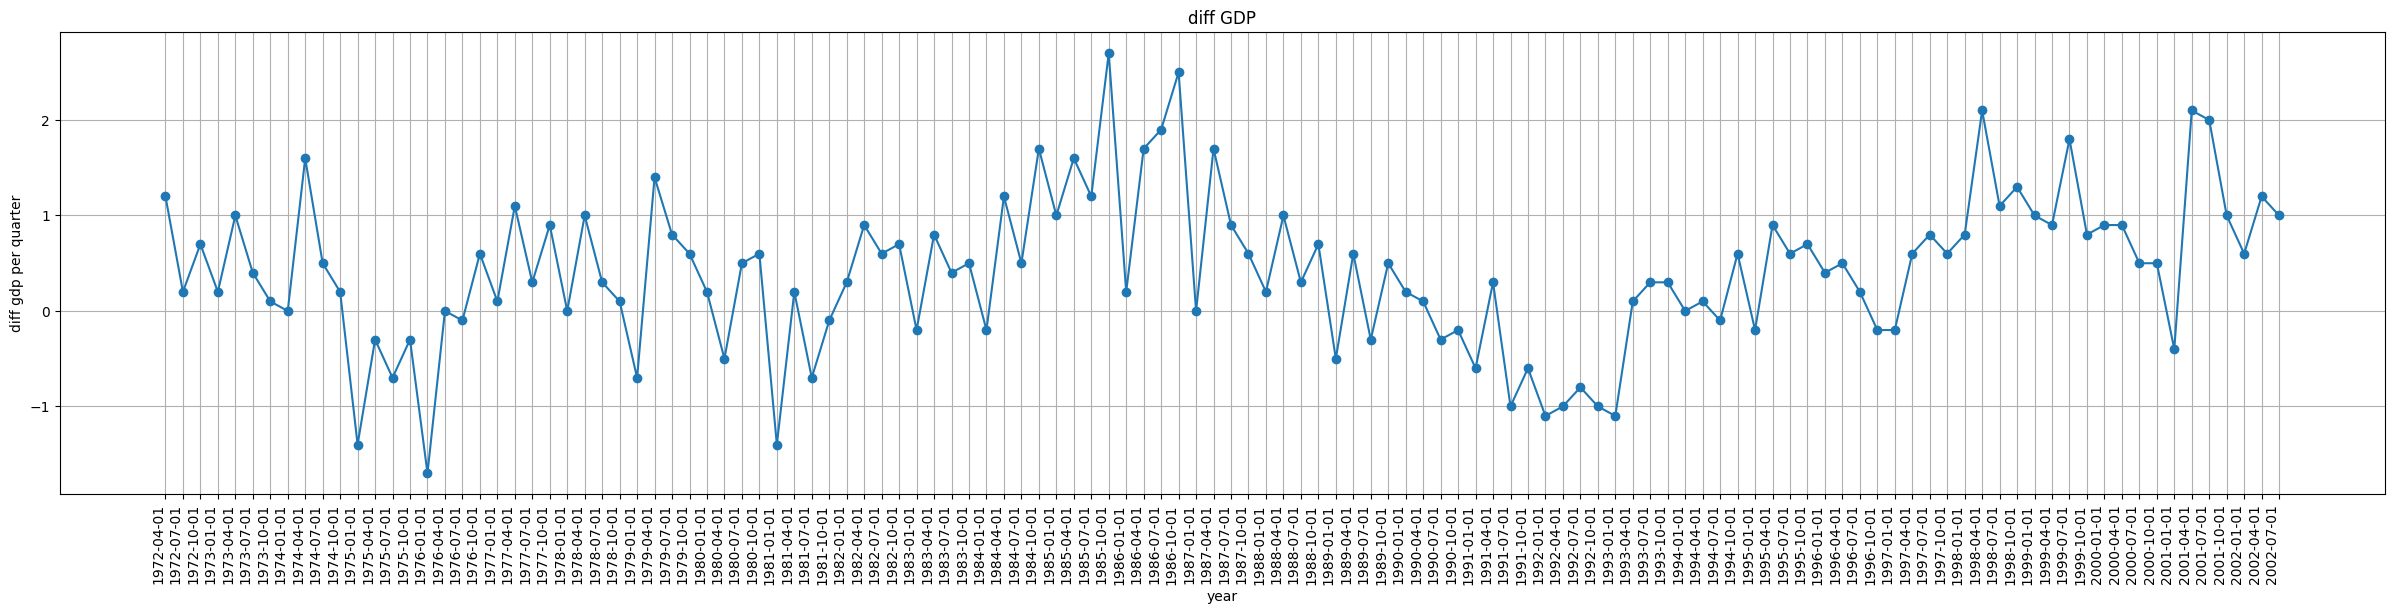

In [114]:

plt.figure(figsize=(30, 6))
plt.plot(df['DATE'], df['diff_gdp'], marker='o', linestyle='-')
plt.title('diff GDP')
plt.xlabel('year')
plt.ylabel('diff gdp per quarter')
plt.grid(True)
plt.xticks(df['DATE'], rotation=90, ha='right')
plt.show()

# recession 바로 이전 값

In [115]:
recessions_csv = pd.read_csv('./fred/JHDUSRGDPBR.csv')

In [116]:
credit_recession_merged = pd.merge(df,recessions_csv, on='DATE', how='outer')

In [117]:
credit_recession_merged = credit_recession_merged.dropna()

In [118]:
credit_recession_merged = credit_recession_merged.rename(columns={"JHDUSRGDPBR":"recession"})

In [119]:
credit_recession_merged

,DATE,GDP,diff_gdp,recession
18,1972-04-01,93.7,1.2,0.0
19,1972-07-01,93.9,0.2,0.0
20,1972-10-01,94.6,0.7,0.0
21,1973-01-01,94.8,0.2,0.0
22,1973-04-01,95.8,1.0,0.0
...,...,...,...,...
135,2001-07-01,140.3,2.0,1.0
136,2001-10-01,141.3,1.0,0.0
137,2002-01-01,141.9,0.6,0.0
138,2002-04-01,143.1,1.2,0.0


In [176]:
credit_recession_merged["recession"] = credit_recession_merged["recession"].astype(int)
credit_recession_merged.to_csv(path_or_buf="./result/gdp_recession")

In [121]:
credit_recession_merged.head(30)

,DATE,GDP,diff_gdp,recession
18,1972-04-01,93.7,1.2,0
19,1972-07-01,93.9,0.2,0
20,1972-10-01,94.6,0.7,0
21,1973-01-01,94.8,0.2,0
22,1973-04-01,95.8,1.0,0
23,1973-07-01,96.2,0.4,0
24,1973-10-01,96.3,0.1,1
25,1974-01-01,96.3,0.0,1
26,1974-04-01,97.9,1.6,1
27,1974-07-01,98.4,0.5,1


In [173]:
df['DATE'] = pd.to_datetime(credit_recession_merged['DATE'])

recession_periods = credit_recession_merged[credit_recession_merged["recession"] == 1]
recession_periods

,DATE,GDP,diff_gdp,recession
24,1973-10-01,96.3,0.1,1
25,1974-01-01,96.3,0.0,1
26,1974-04-01,97.9,1.6,1
27,1974-07-01,98.4,0.5,1
28,1974-10-01,98.6,0.2,1
29,1975-01-01,97.2,-1.4,1
46,1979-04-01,99.2,1.4,1
47,1979-07-01,100.0,0.8,1
48,1979-10-01,100.6,0.6,1
49,1980-01-01,100.8,0.2,1


In [175]:

df.set_index('DATE', inplace=True)

plt.figure(figsize=(30,6))

plt.plot(credit_recession_merged['DATE'], credit_recession_merged['diff_gdp'], color='blue', label='diff_gdp')


plt.grid(True)
plt.xticks(rotation=90, ha='right')
plt.plot(df.index, df['diff_gdp'], marker='o', linestyle='-')

plt.title('GDP Difference with Recession Periods')
plt.xlabel('Date')
plt.ylabel('GDP Difference')

plt.legend()
plt.show()

KeyError: "None of ['DATE'] are in the columns"

In [182]:
import pandas as pd

# 데이터 불러오기
# 데이터프레임 생성
df = pd.read_csv("./result/gdp_recession.csv")

# 경기침체가 시작되는 인덱스 확인
recession_starts = df[df['recession'] == 1].index.tolist()

# GDP 감소율과 경기침체 지속 기간 계산
recession_periods = []
for start in recession_starts:
    # 경기침체 시작 시점
    start_date = df[df['recession'] == 1].loc[start, 'DATE'].iloc[0]
    # 경기침체 종료 시점
    end_date = df.loc[start + 1:]['DATE'][df.loc[start + 1:]['recession'] == 0].iloc[0]
    end_index = df[df['DATE'] == end_date].index[0]
    # 경기침체 기간 동안의 GDP 변화
    recession_period = df.loc[start:end_index]
    # GDP 감소율 계산
    recession_period['GDP_change'] = recession_period['GDP'].pct_change() * 100
    # GDP 감소율 평균 계산
    average_GDP_change = recession_period['GDP_change'].mean()
    # 경기침체 지속 기간 계산
    recession_duration = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days
    recession_periods.append((start_date, end_date, average_GDP_change, recession_duration))

# 결과 출력
print("경기침체 기간 및 GDP 감소율:")
for i, (start, end, gdp_change, duration) in enumerate(recession_periods, 1):
    print(f"경기침체 {i}:")
    print(f"시작일: {start}, 종료일: {end}, GDP 감소율: {gdp_change:.2f}%, 지속 기간: {duration} 일")


AttributeError: 'str' object has no attribute 'iloc'